In [55]:
import pandas as pd
from gensim.models import CoherenceModel
from gensim.models import LdaModel
from gensim.models.ldamulticore import LdaMulticore
from pprint import pprint
from gensim import corpora
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from ast import literal_eval

In [56]:
tokenized_doc = pd.read_csv("tokenized.csv")

In [57]:
tokenized_doc["Content"] = tokenized_doc["Content"].apply(literal_eval)

In [58]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
dictionary = corpora.Dictionary(tokenized_doc["Content"])
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
corpus = [dictionary.doc2bow(doc) for doc in tokenized_doc["Content"]]

In [59]:
print(len(dictionary))
print(len(corpus))

291313
427467


In [60]:
num_topics = 2
chunksize = 5000
#passes = 20
#iterations = 400
eval_every = None

In [66]:
lda_model = LdaModel(corpus, id2word=dictionary, num_topics=num_topics,chunksize=chunksize,eval_every = eval_every,alpha='auto',eta = 'auto', random_state=42)

In [67]:
corpus_lda = lda_model[corpus]

In [68]:
top_topics = lda_model.top_topics(corpus_lda)

In [70]:
pprint(top_topics)

[([(0.019313345, 'like'),
   (0.016239371, 'feel'),
   (0.015890004, 'know'),
   (0.014520557, 'want'),
   (0.012255402, 'think'),
   (0.010846716, 'time'),
   (0.010404647, 'make'),
   (0.009439789, 'people'),
   (0.009318195, 'tell'),
   (0.008311546, 'even'),
   (0.007817178, 'never'),
   (0.0074019195, 'life'),
   (0.0073919287, 'go'),
   (0.0070082177, 'love'),
   (0.0063056923, 'talk'),
   (0.0061643585, 'friends'),
   (0.006112006, 'say'),
   (0.0054182108, 'much'),
   (0.005359549, 'years'),
   (0.0053326725, 'things')],
  0.0),
 ([(0.010672021, 'work'),
   (0.009613794, 'go'),
   (0.008112055, 'take'),
   (0.0068968995, 'time'),
   (0.0058836597, 'back'),
   (0.005643152, 'make'),
   (0.0054433304, 'come'),
   (0.0052778795, 'home'),
   (0.005154515, 'people'),
   (0.0048448634, 'school'),
   (0.0047433567, 'house'),
   (0.004576779, 'like'),
   (0.004451955, 'money'),
   (0.0043554134, 'live'),
   (0.0043547517, 'start'),
   (0.004330402, 'say'),
   (0.00412495, 'even'),
   (

In [71]:
# Compute Coherence Score
cm = CoherenceModel(model=lda_model,corpus=corpus, coherence='u_mass')
cm.get_coherence()

-0.9040747265731173

In [72]:
# Compute Coherence Score
cm2 = CoherenceModel(model=lda_model,texts=tokenized_doc["Content"] , coherence='c_v')
cm2.get_coherence()

0.2905574493315562

In [29]:
num_topics = 5
chunksize = 2000
#passes = 20
#iterations = 400
eval_every = None

In [30]:
lda_model2 = LdaModel(corpus, id2word=dictionary, num_topics=num_topics,chunksize=chunksize,eval_every = eval_every,alpha='auto',eta = 'auto')

In [31]:
corpus_lda2 = lda_model2[corpus]

In [32]:
cm2 = CoherenceModel(model=lda_model2,corpus=corpus_lda2, coherence='u_mass')
cm2.get_coherence()

-0.4944498515481951

In [33]:
num_topics = 5
chunksize = 10000
#passes = 20
#iterations = 400
eval_every = None

In [34]:
lda_model3 = LdaModel(corpus, id2word=dictionary, num_topics=num_topics,chunksize=chunksize,eval_every = eval_every,alpha='auto',eta = 'auto')

In [35]:
corpus_lda3 = lda_model3[corpus]

In [36]:
cm3 = CoherenceModel(model=lda_model3,corpus=corpus_lda3, coherence='u_mass')
cm3.get_coherence()

-3.8974282416151675

In [37]:
num_topics = 5
chunksize = 20000
#passes = 20
#iterations = 400
eval_every = None

In [38]:
lda_model4 = LdaModel(corpus, id2word=dictionary, num_topics=num_topics,chunksize=chunksize,eval_every = eval_every,alpha='auto',eta = 'auto')

In [39]:
corpus_lda4 = lda_model4[corpus]

In [40]:
cm4 = CoherenceModel(model=lda_model4,corpus=corpus_lda4, coherence='u_mass')
cm4.get_coherence()

-3.519319531607727

In [41]:
num_topics = 5
chunksize = 50000
#passes = 20
#iterations = 400
eval_every = None

In [42]:
lda_model5 = LdaModel(corpus, id2word=dictionary, num_topics=num_topics,chunksize=chunksize, eval_every = eval_every,alpha='auto',eta = 'auto')

In [43]:
corpus_lda5 = lda_model5[corpus]

In [44]:
cm5 = CoherenceModel(model=lda_model5,corpus=corpus_lda5, coherence='u_mass')
cm5.get_coherence()

-4.362792807778169

## Parameter tunning

In [73]:
start,stop,step=2,22,2
coherence_values = []
model_list = []
corpus_list = []

In [74]:
for num_topics in range(start, stop, step):
    model =  LdaModel(corpus, id2word=dictionary, num_topics=num_topics,chunksize=2000,eval_every = eval_every,alpha='auto',eta = 'auto',random_state=42)  # train model
    #corpus_new = model[corpus]
    model_list.append(model)
    #corpus_list.append(corpus_new)
    
    cm = CoherenceModel(model=model,texts=tokenized_doc["Content"] , coherence='c_v')
    score = cm.get_coherence()
    coherence_values.append(score)
    print(score)

0.30414874524137314
0.3432735653121639
0.36048045860759764
0.39222881649708363
0.38718941856204236
0.40982208134706233
0.4300225160378349
0.40981487619763746
0.45442734933571
0.4098475203587869


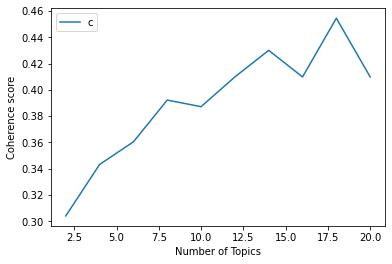

In [75]:
x = range(start, stop, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [81]:
import numpy as np
n = np.argmax(coherence_values)
n

8

In [83]:
opt = model_list[n]

In [84]:
corpus_new = opt[corpus]
top_topics = opt.top_topics(corpus_new)
pprint(top_topics)

[([(0.13043633, 'play'),
   (0.09887096, 'game'),
   (0.083998196, 'watch'),
   (0.039507613, 'music'),
   (0.03613897, 'video'),
   (0.027551861, 'show'),
   (0.02501758, 'character'),
   (0.023867736, 'movie'),
   (0.019139674, 'movies'),
   (0.016329713, 'enjoy'),
   (0.011040564, 'listen'),
   (0.010745591, 'anime'),
   (0.009219073, 'bore'),
   (0.009090188, 'songs'),
   (0.008504981, 'sport'),
   (0.008305516, 'favorite'),
   (0.007795873, 'countries'),
   (0.007147264, 'incel'),
   (0.007136531, 'team'),
   (0.006197795, 'football')],
  0.0),
 ([(0.061432365, 'ampx200b'),
   (0.02809161, 'country'),
   (0.022787167, 'english'),
   (0.02212272, 'society'),
   (0.016085401, 'write'),
   (0.0160803, 'work'),
   (0.01578344, 'language'),
   (0.015638316, 'learn'),
   (0.013595967, 'study'),
   (0.01242766, 'career'),
   (0.01173966, 'interview'),
   (0.011278861, 'apply'),
   (0.0096113775, 'degree'),
   (0.008082638, 'dream'),
   (0.007933818, 'company'),
   (0.0077988394, 'experie

In [85]:
def get_word_cloud_text(weights, id2token):
    d = {f'{id2token[i]}': int(w * 100.0) for i, w in enumerate(weights)}
    return d

def create_word_cloud(d):
    wc = WordCloud(background_color='black')
    wc.generate_from_frequencies(d)
    return wc

def plot_word_cloud(w, id2token):
    wc_texts = [get_word_cloud_text(w[r], id2token) for r in range(w.shape[0])]
    clouds = [create_word_cloud(text) for text in wc_texts]

    fig, axes = plt.subplots(1, 2, figsize=(20, 5))

    for ax, cloud in zip(axes, clouds):
        _ = ax.imshow(cloud, interpolation='bilinear')
        _ = ax.grid(False)
        _ = ax.axis('off')

    plt.tight_layout()

In [86]:
w = opt.get_topics()
w

array([[4.8273904e-04, 3.0066763e-06, 2.3233451e-05, ..., 1.7092296e-07,
        1.7092296e-07, 1.7092296e-07],
       [1.6513717e-07, 3.3339340e-04, 3.6070836e-04, ..., 1.6513715e-07,
        1.6513715e-07, 1.6513715e-07],
       [9.8933661e-08, 3.1392901e-08, 1.7367235e-03, ..., 3.1384332e-08,
        3.1384332e-08, 3.1384332e-08],
       ...,
       [1.3212823e-04, 2.2630955e-04, 1.0001302e-03, ..., 2.1661574e-08,
        2.1661574e-08, 2.1661574e-08],
       [6.3741396e-08, 3.8092944e-06, 1.7321183e-04, ..., 6.3740842e-08,
        6.3740842e-08, 6.3740842e-08],
       [5.2190619e-05, 1.4192700e-04, 4.2757025e-04, ..., 1.4085359e-08,
        1.4085359e-08, 1.4085359e-08]], dtype=float32)

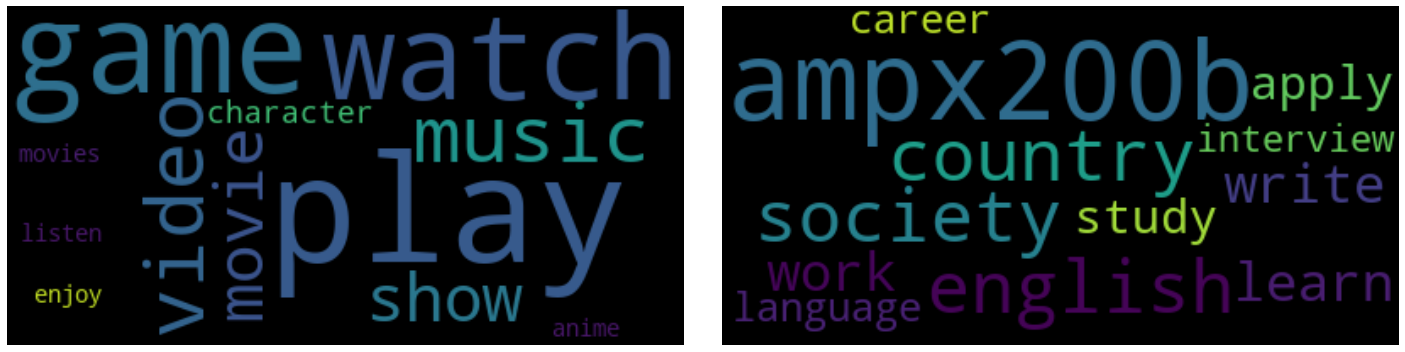

In [87]:
plot_word_cloud(w, opt.id2word.id2token)